<a href="https://colab.research.google.com/github/duongnghiephuy/Student-Project/blob/master/Cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import models,layers


The data is provide on: https://www.kaggle.com/c/dogs-vs-cats

The data consists of 25000 images of dogs and cats. 
However due to limited resource, I only want to use 4000 images in total. The target is to distinguish cats and dogs. 

Download the data then copy 4000 images and seperate those 4000 images into 3 set:
- training set:2000 images 
- validation set:1000 images 
- test set:1000 images


Convolutional network is the most popular and successful model in dealing with computer vision problem. Therefore, I choose to build a simple linear stack of layers with Dense Layers on top of a few Convolutional Layers.

**Convolutional Layer:**

As we already know, a 2D image is of the form (height, width, channel). It therefore can be considered as a 3D tensor of integer values in the range 0-255. 

If a feedforward network is implemented, 3D tensor is flatten before the model learns a parameter for each value in that 3D tensor, resulting in billions parameters. It is expensive.

The convolution instead implements kernel trick that facilitates parameter sharing and equivariant representation.














In [0]:
network=models.Sequential()
network.add(layers.Conv2D(input_shape=(150,150,3),filters=32,kernel_size=(3,3),activation="relu"))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(512,activation="relu"))
network.add(layers.Dense(1,activation="sigmoid"))

network.summary()

            

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

The image is of size (150,150,3). 3 stands for RGB channel.

**The 1st kernel in the 1st Convolutional Layer then is of shape (3,3,3).**

It continously moves over the 3D tensor (150,150,3) with a stride 1(step=1). In each position, it performs a dot product with that tensor's piece of size(3,3,3) to output a scalar value. Due to the padding effect(that we can tweak), the output called a filter is of size(148,148).

The 1st Conolution uses 32 such kernels to produce 32 filters. The final output then is of size(148,148,32)-the stack of 32 filters. It is called a feature map.

The number of parameters required is: 3 times 3 times 3(kernel size) times 32(filters)+32(bias of each filter)=896

**Advantage over feedforward network:**
- The required parameter is drastically lower. (parameter sharing)





**The MaxPooling Layer** is used to learn equivariant representation and reduce size of data.

The 2nd layer: Max Pooling scans over each window(2,2) and reduces it to its single maximum value.

The axis 0 and 1 then is downsampled by 2.(148,148,32)->(74,74,32)



After a few Convolutional and MaxPooling Layer, we stack a Flatten Layer to feed data to two Dense Layers. The final output is a single value from the function sigmoid that indicates the probability of the image belonging to class 1("cat").

In [0]:
network.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


The data is put on Google Drive so this code allows Goolge Colab to access Drive directory.

In [0]:

train_dir="/content/gdrive/My Drive/Practice/data/small_data/train"
validation_dir="/content/gdrive/My Drive/Practice/data/small_data/validation"
test_dir="/content/gdrive/My Drive/Practice/data/small_data/test"




In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255)
validation_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_dir,class_mode="binary",batch_size=20,target_size=(150,150))
validation_generator=validation_datagen.flow_from_directory(validation_dir,class_mode="binary",batch_size=20,target_size=(150,150))
test_generator=test_datagen.flow_from_directory(test_dir,class_mode="binary",batch_size=20,target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


Images must be turned to tensor. Keras modules are utilize.

**The rescale step is necessary as the neural network prefers working with small value.**

Large scale values may lead to accumulation of large, exploding gradient.


In [0]:
history=network.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 560s 6s/step - loss: 0.7058 - acc: 0.5225 - val_loss: 0.6897 - val_acc: 0.5170
Epoch 2/10
100/100 [==============================] - 115s 1s/step - loss: 0.7276 - acc: 0.5870 - val_loss: 0.6755 - val_acc: 0.5690
Epoch 3/10
100/100 [==============================] - 115s 1s/step - loss: 0.6320 - acc: 0.6690 - val_loss: 0.6235 - val_acc: 0.6480
Epoch 4/10
100/100 [==============================] - 115s 1s/step - loss: 0.6148 - acc: 0.6920 - val_loss: 0.6077 - val_acc: 0.6840
Epoch 5/10
100/100 [==============================] - 116s 1s/step - loss: 0.6581 - acc: 0.6960 - val_loss: 0.8398 - val_acc: 0.5880
Epoch 6/10
100/100 [==============================] - 116s 1s/step - loss: 7.1796 - acc: 0.5215 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 116s 1s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 117s 1s/step - 

In [0]:
network.save("cats_vs_dogs_small1.h5")

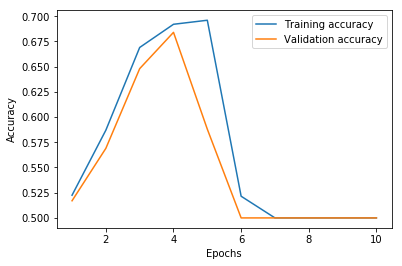

In [0]:
acc=history.history["acc"]
val_acc=history.history["val_acc"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

import matplotlib.pyplot as plt
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(range(1,len(acc)+1),acc,label="Training accuracy")
plt.plot(range(1,len(acc)+1),val_acc,label="Validation accuracy")
plt.legend()
plt.show()



**Too bad**, the model is clearly underfitting as the accuracy on training set decreases after 6 epochs to 50%.

50% is the accuracy of a random guess so we clearly have to improve it by:
- Changing the capacity of Dense Layer to capture more represenations.
- Changing the learning rate as the model seems to stuck in a valley.
- Providing more data

**Data Augumentation:**
We make use of Keras Augumentation Tool to provide model with more data.

In [0]:
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator










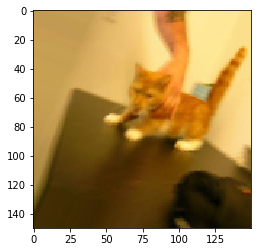

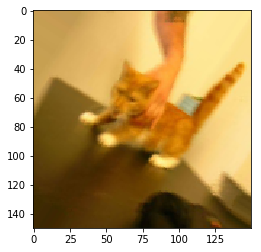

In [0]:
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
train_dir="/content/gdrive/My Drive/Practice/data/small_data/train"

fnames=os.listdir(os.path.join(train_dir,"cats"))
img_path=os.path.join(train_dir,"cats/"+fnames[0])

img=image.load_img(img_path,target_size=(150,150))

x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

j=0
for e in datagen.flow(x,batch_size=1):
  plt.figure(j)
  plt.imshow(image.array_to_img(e[0]))
  j+=1
  if j==2:
    break
plt.show()





  

**This is the result of Data Augumentation on an image.**

In [0]:
validation_dir="/content/gdrive/My Drive/Practice/data/small_data/validation"
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,rescale=1.0/255)
valgen=ImageDataGenerator(rescale=1.0/255)

datagenerator=datagen.flow_from_directory(train_dir,target_size=(150,150),class_mode="binary",batch_size=32)
valgenerator=valgen.flow_from_directory(validation_dir,target_size=(150,150),class_mode="binary",batch_size=32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**This time, we increases the Dense Layer capacity and reduce the learning rate.**

In [0]:
from keras import optimizers

network=models.Sequential()
network.add(layers.Conv2D(input_shape=(150,150,3),filters=32,kernel_size=(3,3),activation="relu"))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(2048,activation="relu"))
network.add(layers.Dense(2048,activation="relu"))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer=optimizers.rmsprop(lr=0.0001),loss="binary_crossentropy",metrics=["acc"])





In [0]:
history=network.fit_generator(datagenerator,steps_per_epoch=100,epochs=10,validation_data=valgenerator,validation_steps=50,use_multiprocessing=True)

Epoch 1/10
100/100 [==============================] - 228s 2s/step - loss: 0.7000 - acc: 0.5372 - val_loss: 0.6797 - val_acc: 0.5190
Epoch 2/10
100/100 [==============================] - 219s 2s/step - loss: 0.6761 - acc: 0.5919 - val_loss: 0.6395 - val_acc: 0.6308
Epoch 3/10
100/100 [==============================] - 220s 2s/step - loss: 0.6434 - acc: 0.6306 - val_loss: 0.6066 - val_acc: 0.6688
Epoch 4/10
100/100 [==============================] - 220s 2s/step - loss: 0.6286 - acc: 0.6562 - val_loss: 0.5957 - val_acc: 0.6669
Epoch 5/10
100/100 [==============================] - 217s 2s/step - loss: 0.6105 - acc: 0.6775 - val_loss: 0.5849 - val_acc: 0.6834
Epoch 6/10
100/100 [==============================] - 224s 2s/step - loss: 0.5920 - acc: 0.6772 - val_loss: 0.6810 - val_acc: 0.6405
Epoch 7/10
100/100 [==============================] - 219s 2s/step - loss: 0.5810 - acc: 0.6922 - val_loss: 0.5874 - val_acc: 0.6777
Epoch 8/10
100/100 [==============================] - 221s 2s/step - 

In [0]:
network.save("/content/gdrive/My Drive/Practice/cats_vs_dogs_v2.h5")

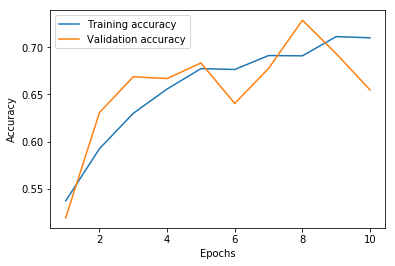

In [0]:
train_acc=history.history["acc"]
val_acc=history.history["val_acc"]
plt.plot(range(1,len(train_acc)+1),train_acc,label="Training accuracy")
plt.plot(range(1,len(val_acc)+1),val_acc,label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()


**Fortunately, our strategy works as the training accuracy reaches 71% and validation accuracy can hover around 70%.**

From the plot, we notice that the model can still imrpove by increasing epochs. However, it is unlikely that we can go far due to the lack of data.